<ipython-input-40-ea864076db09>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-darkgrid')


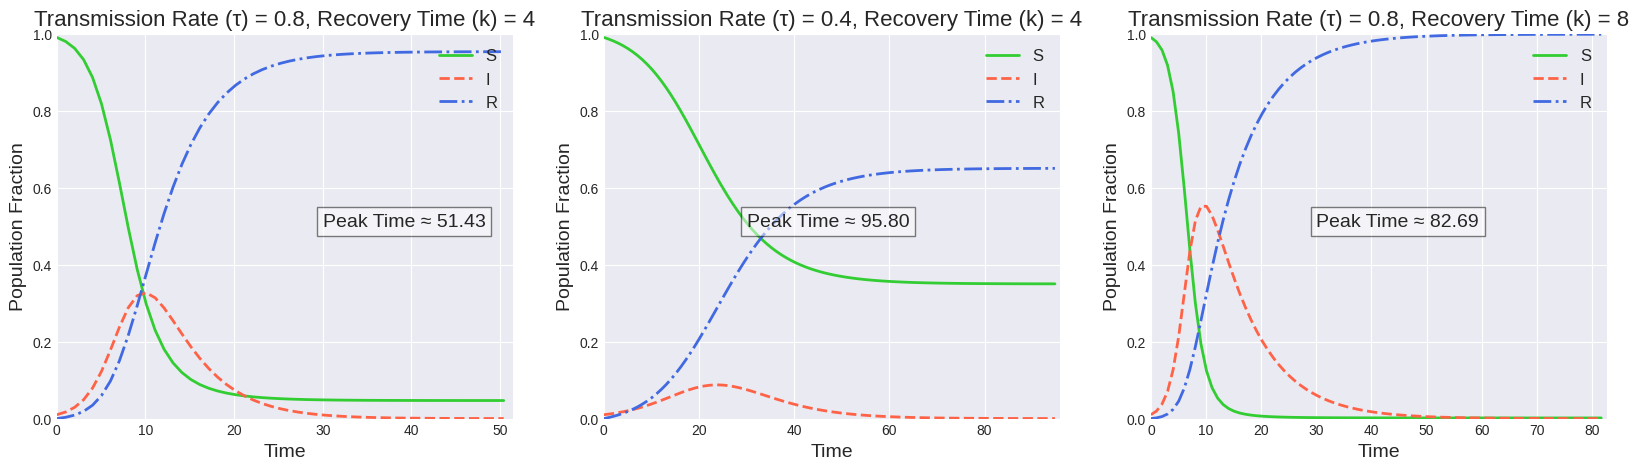

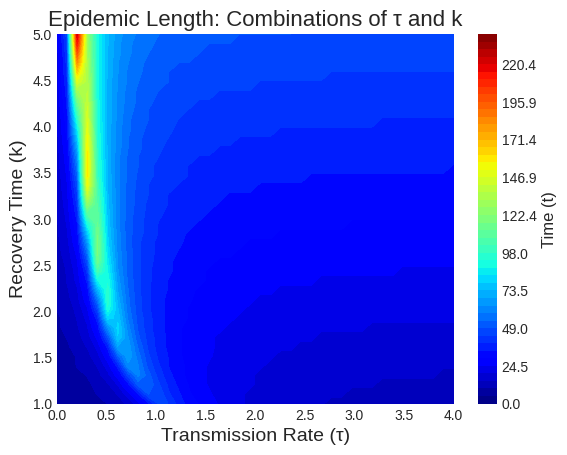

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as style
from scipy import integrate

t = np.linspace(0, 120, 120)
def derivative(X,t,τ,k):
  S, I, R= X
  dS = -τ*S*I
  dI = τ*S*I - I/k
  dR = I/k
  return np.array([dS, dI, dR])

def derivativeNew(X,t,τ,k):
  S, I, R, V= X
  v = 1/(τ*k*0.99)
  f = v*I*R/(I+R)
  dS = -τ*S*I - f
  dI = τ*S*I - I/k
  dR = I/k
  dV = f
  return np.array([dS, dI, dR, dV])

def plotting():
  style.use('seaborn-darkgrid')
  fig,ax = plt.subplots(1,3, figsize=(20,5))
  τList, kList = [0.8,0.4,0.8],[4,4,8]
  for i in range(3):
    I0 = 0.01 #inital condition
    S0 = 0.99 #initial condition
    R0 = 0 #initial condition
    tmax = 0
    X0 = S0, I0, R0

    τ, k = τList[i],kList[i]
    res = integrate.odeint(derivative, X0, t,(τ,k))
    S, I, R = res.T

    for j in range(len(I)):
      if I[j] <0.0001:
        tmax=j
        break
    p = ax[i]
    p.plot(t[:tmax], S[:tmax], color='limegreen', linestyle='-', label='S', linewidth=2)
    p.plot(t[:tmax], I[:tmax], color='tomato', linestyle='--', label='I', linewidth=2)
    p.plot(t[:tmax], R[:tmax], color='royalblue', linestyle='-.', label='R', linewidth=2)

    p.set_xlabel('Time', fontsize=14)
    p.set_ylabel('Population Fraction', fontsize=14)
    p.set_xlim([0, t[tmax]])
    p.set_ylim([0, 1])
    p.set_title(f"Transmission Rate (τ) = {τ}, Recovery Time (k) = {k}", fontsize=16)
    p.text(30, 0.5, f"Peak Time ≈ {t[tmax]:.2f}", fontsize=14, bbox=dict(facecolor='white', alpha=0.5))
    p.legend(fontsize=12, loc='upper right')
  plt.show();


plotting()


def timeF(X,Y):
  tmax = 0
  S0 = 0.99
  R0 = 0
  I0 = 0.01
  X0 = S0, I0, R0
  arr = np.zeros([40,40])
  t = np.linspace(0, 240, 240)
  for i in range(40):
    for j in range(40):
      τ=X[i][j]
      k=Y[i][j]
      res = integrate.odeint(derivative, X0, t,(τ,k))
      S, I, R = res.T
      for f in range(len(I)):
        if I[f] <0.0001:
          arr[i][j]=f
          break
  return arr

def contourPlot(func):
  plt.clf()
  plt.figure
  Tlist = np.linspace(0, 4, 40) #40 diff values for both
  klist = np.linspace(1, 5, 40)
  Tlist, klist = np.meshgrid(Tlist, klist)
  t = func(Tlist,klist)
  levels = np.linspace(0,240)
  contour_filled = plt.contourf(Tlist, klist, t,levels=levels,cmap='jet'); #color of map
  plt.xlabel('Transmission Rate (τ)', fontsize=14)
  plt.ylabel('Recovery Time (k)', fontsize=14)
  cbar = plt.colorbar(contour_filled)
  cbar.set_label('Time (t)', fontsize=12)
  plt.title('Epidemic Length: Combinations of τ and k', fontsize=16)
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.show()
contourPlot(timeF)

